In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [15]:
def plot_single_tuning_curve(cell_tuning,cell_ID,frequencies,intensities):

    fig = plt.figure(1)
    ax = fig.gca()

    im = plt.imshow(np.transpose(cell_tuning),cmap='winter',origin='lower')
    plt.colorbar(im)

    if len(frequencies)>5: # if we have a lot of frequencies
        # only show a label for every second frequency
        ax.set_xticks(range(0,len(frequencies),2))
        ax.set_xticklabels(frequencies[range(0,len(frequencies),2)])
    else:
        # otherwise show every frequency label
        ax.set_xticks(range(0,len(frequencies)))
        ax.set_xticklabels(frequencies[range(0,len(frequencies))])

    # show every intensity label
    ax.set_yticks(range(0,len(intensities)))
    ax.set_yticklabels(intensities)

    # label the axes
    ax.set_ylabel("Intensity (dB)")
    ax.set_xlabel("Frequency (Hz)")

    plt.title(cell_ID)
    plt.show()

In [13]:
def plot_tuning_traces(cell_traces,n_frequencies,n_intensities,y_limit):

    fig,axs = plt.subplots(n_intensities,n_frequencies,sharex='col',sharey='row',figsize=(14,5))

    for row,freq in zip(range(n_frequencies),cell_traces.keys()):
        for col,itsy in zip(range(n_intensities),reversed(list(cell_traces[freq].keys()))):
            for rep in cell_traces[freq][itsy]:
                axs[col,row].plot(cell_traces[freq][itsy][rep]) # plot every trial

            # miscellaneous formatting
            axs[col,row].set_xticks([])
            axs[col,row].set_yticks([])
            if row==0:
                axs[col,row].set_ylabel(itsy) # add the intensity to the far left edge
            if col==n_intensities-1:
                axs[col,row].set_xlabel(freq) # add the frequency at the bottom
            axs[col,row].axvline(x=4,color='k',linestyle='--')
            axs[col,row].set_ylim(bottom=0,top=y_limit)
            axs[col,row].autoscale(enable=True, axis='x', tight=True)

    fig.subplots_adjust(wspace=0,hspace=0)
    fig.set_facecolor('white')
    fig.text(0.5,0.01,"Frequency (Hz)",va='center',ha='center')
    fig.text(0.08,0.5,"Intensity (dB)",va='center',ha='center',rotation='vertical')
    plt.show()

In [4]:
with open('/media/vtarka/USB DISK/Lab/2P/Vid_222/cells.pkl', 'rb') as f:
        cell_dictionary = pickle.load(f)


In [5]:
print(cell_dictionary.keys())

dict_keys([3, 9, 20, 22, 25, 27, 28, 29, 43, 46, 47, 48, 53, 55, 57, 58, 63, 64, 76, 77, 81, 83, 88, 89, 90, 93, 95, 101, 103, 110, 118, 119, 121, 124, 125, 129, 130, 136, 137, 141, 160, 163, 171, 180, 188, 189, 193, 200, 212, 221, 239, 249, 258, 269, 279, 289, 290, 298, 322, 327, 373, 378, 381, 402, 405, 444, 458, 482, 488, 636, 689, 718, 759, 807, 851, 1058, 1127, 1189, 1259, 1370, 1648, 2106])


In [6]:
for cell in cell_dictionary:
    if cell_dictionary[cell]['active']:
        print(cell)

3
9
20
22
25
27
28
29
43
46
47
48
53
55
57
58
63
64
76
77
81
83
88
89
90
93
95
101
103
110
118
119
121
124
125
129
130
136
137
141
160
163
171
180
188
189
193
200
212
221
239
249
258
269
279
289
290
298
322
327
373
378
381
402
405
444
458
482
488
636
689
718
759
807
851
1058
1127
1189
1259
1370
1648
2106


True


TypeError: list indices must be integers or slices, not range

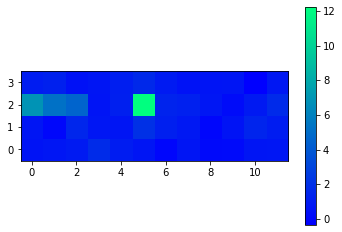

In [20]:

cell_ID = 327
print(cell_dictionary[cell_ID]['active'])
frequencies = list(cell_dictionary[cell_ID]['traces'].keys())
intensities = list(cell_dictionary[cell_ID]['traces'][frequencies[0]].keys())
plot_single_tuning_curve(cell_dictionary[cell_ID]['tuning'],cell_ID,frequencies,intensities)
# get_cell_tuning_by_peak(cell_dictionary[cell_ID]['traces'],True)
plot_tuning_traces(cell_dictionary[cell_ID]['traces'],12,4,1300)